In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [30]:
datapath = Path("./data/bicycle/")

# train.csv [파일]

data_id : 문제번호
datetime : 대여 시점 (연도, 월, 일, 시간 등이 포함된 시계열 데이터)
season : 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)
holiday : 공휴일 여부 (0: 공휴일 아님, 1: 공휴일)
workingday : 평일 여부 (0: 휴일, 1: 평일)
weather : 날씨 (1: 맑음, 2: 약간 흐림, 3: 흐림/가벼운 비, 4: 폭우/눈 등)
temp : 실제 온도 (섭씨)
atemp : 체감 온도 (섭씨)
humidity : 습도 (%)
windspeed : 풍속 (m/s)
casual : 비회원 이용자 수 (학습 데이터에만 포함)
registered : 등록된 회원 이용자 수 (학습 데이터에만 포함)
count : 총 대여 수 (학습 데이터에만 포함)
- casual과 registered의 합으로, 모델이 예측해야 할 최종 목표입니다.
(학습시 casual, registered, count를 각각 예측할 경우도 있고, 간단히 약식으로 count만 예측하는 경우도 있음)


test.csv [파일]

train 데이터와 구성 동일
casual, registered, count 가 존재하지 않음

In [31]:
train_df = pd.read_csv(datapath / "train.csv")
train_df["datetime"] = pd.to_datetime(train_df["datetime"])
train_df.set_index("datetime", inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7620 entries, 2012-12-07 14:00:00 to 2011-03-17 08:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      7620 non-null   int64  
 1   holiday     7620 non-null   int64  
 2   workingday  7620 non-null   int64  
 3   weather     7620 non-null   int64  
 4   temp        7620 non-null   float64
 5   atemp       7620 non-null   float64
 6   humidity    7620 non-null   int64  
 7   windspeed   7620 non-null   float64
 8   casual      7620 non-null   int64  
 9   registered  7620 non-null   int64  
 10  count       7620 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 714.4 KB


In [32]:
test_df = pd.read_csv(datapath / "test.csv")
test_df["datetime"] = pd.to_datetime(test_df["datetime"])
test_df.set_index("datetime", inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3266 entries, 2012-06-14 13:00:00 to 2011-05-07 18:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      3266 non-null   int64  
 1   holiday     3266 non-null   int64  
 2   workingday  3266 non-null   int64  
 3   weather     3266 non-null   int64  
 4   temp        3266 non-null   float64
 5   atemp       3266 non-null   float64
 6   humidity    3266 non-null   int64  
 7   windspeed   3266 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 229.6 KB


In [33]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-07 14:00:00,4,0,1,2,14.76,17.425,71,11.0014,40,175,215
2012-06-17 01:00:00,2,0,0,1,22.96,26.515,60,11.0014,21,67,88
2012-07-05 22:00:00,3,0,1,1,33.62,40.150,59,8.9981,63,162,225
2011-07-17 12:00:00,3,0,0,1,31.16,34.850,55,19.0012,177,243,420
2011-11-09 15:00:00,4,0,1,1,21.32,25.000,45,15.0013,21,130,151


In [34]:
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2012-06-14 13:00:00,2,0,1,1,27.88,31.820,57,11.0014
2011-11-13 00:00:00,4,0,0,2,16.40,20.455,58,12.9980
2012-08-16 01:00:00,3,0,1,1,26.24,30.305,73,0.0000
2011-12-14 19:00:00,4,0,1,2,14.76,18.180,62,7.0015
2011-10-12 06:00:00,4,0,1,2,22.14,25.760,88,16.9979


## EDA (input : 9)
### 카테고리 데이터    : season, holiday, workingday(근무 유무), weather
### 연속된 숫자 데이터 : temp, atemp(체감온도), humidity, windspeed
### 데이터가 아닌 것   : datetime

In [35]:
train_df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [36]:
test_df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<Axes: xlabel='weather', ylabel='count'>

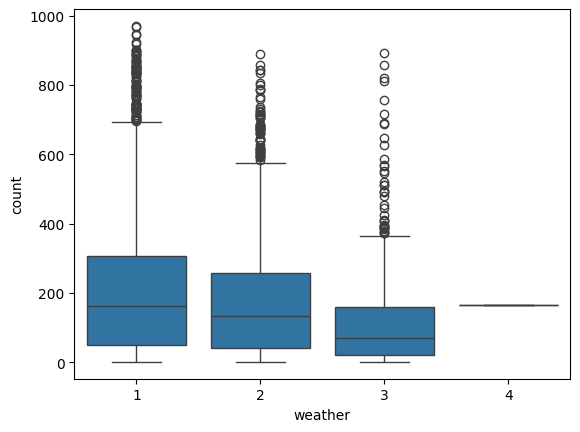

In [37]:
sns.boxplot(data=train_df, x="weather", y="count")

<Axes: xlabel='season', ylabel='count'>

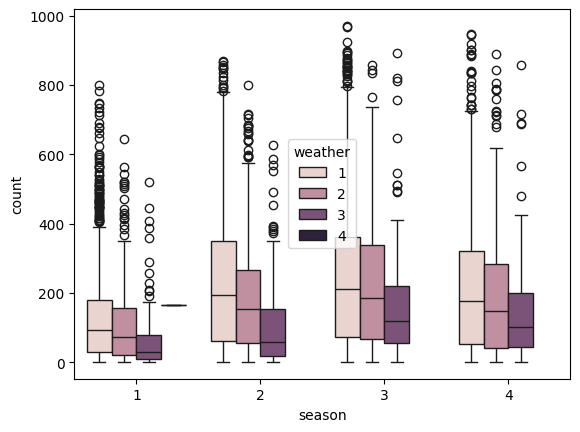

In [38]:
sns.boxplot(data=train_df, x="season", y="count", hue="weather")

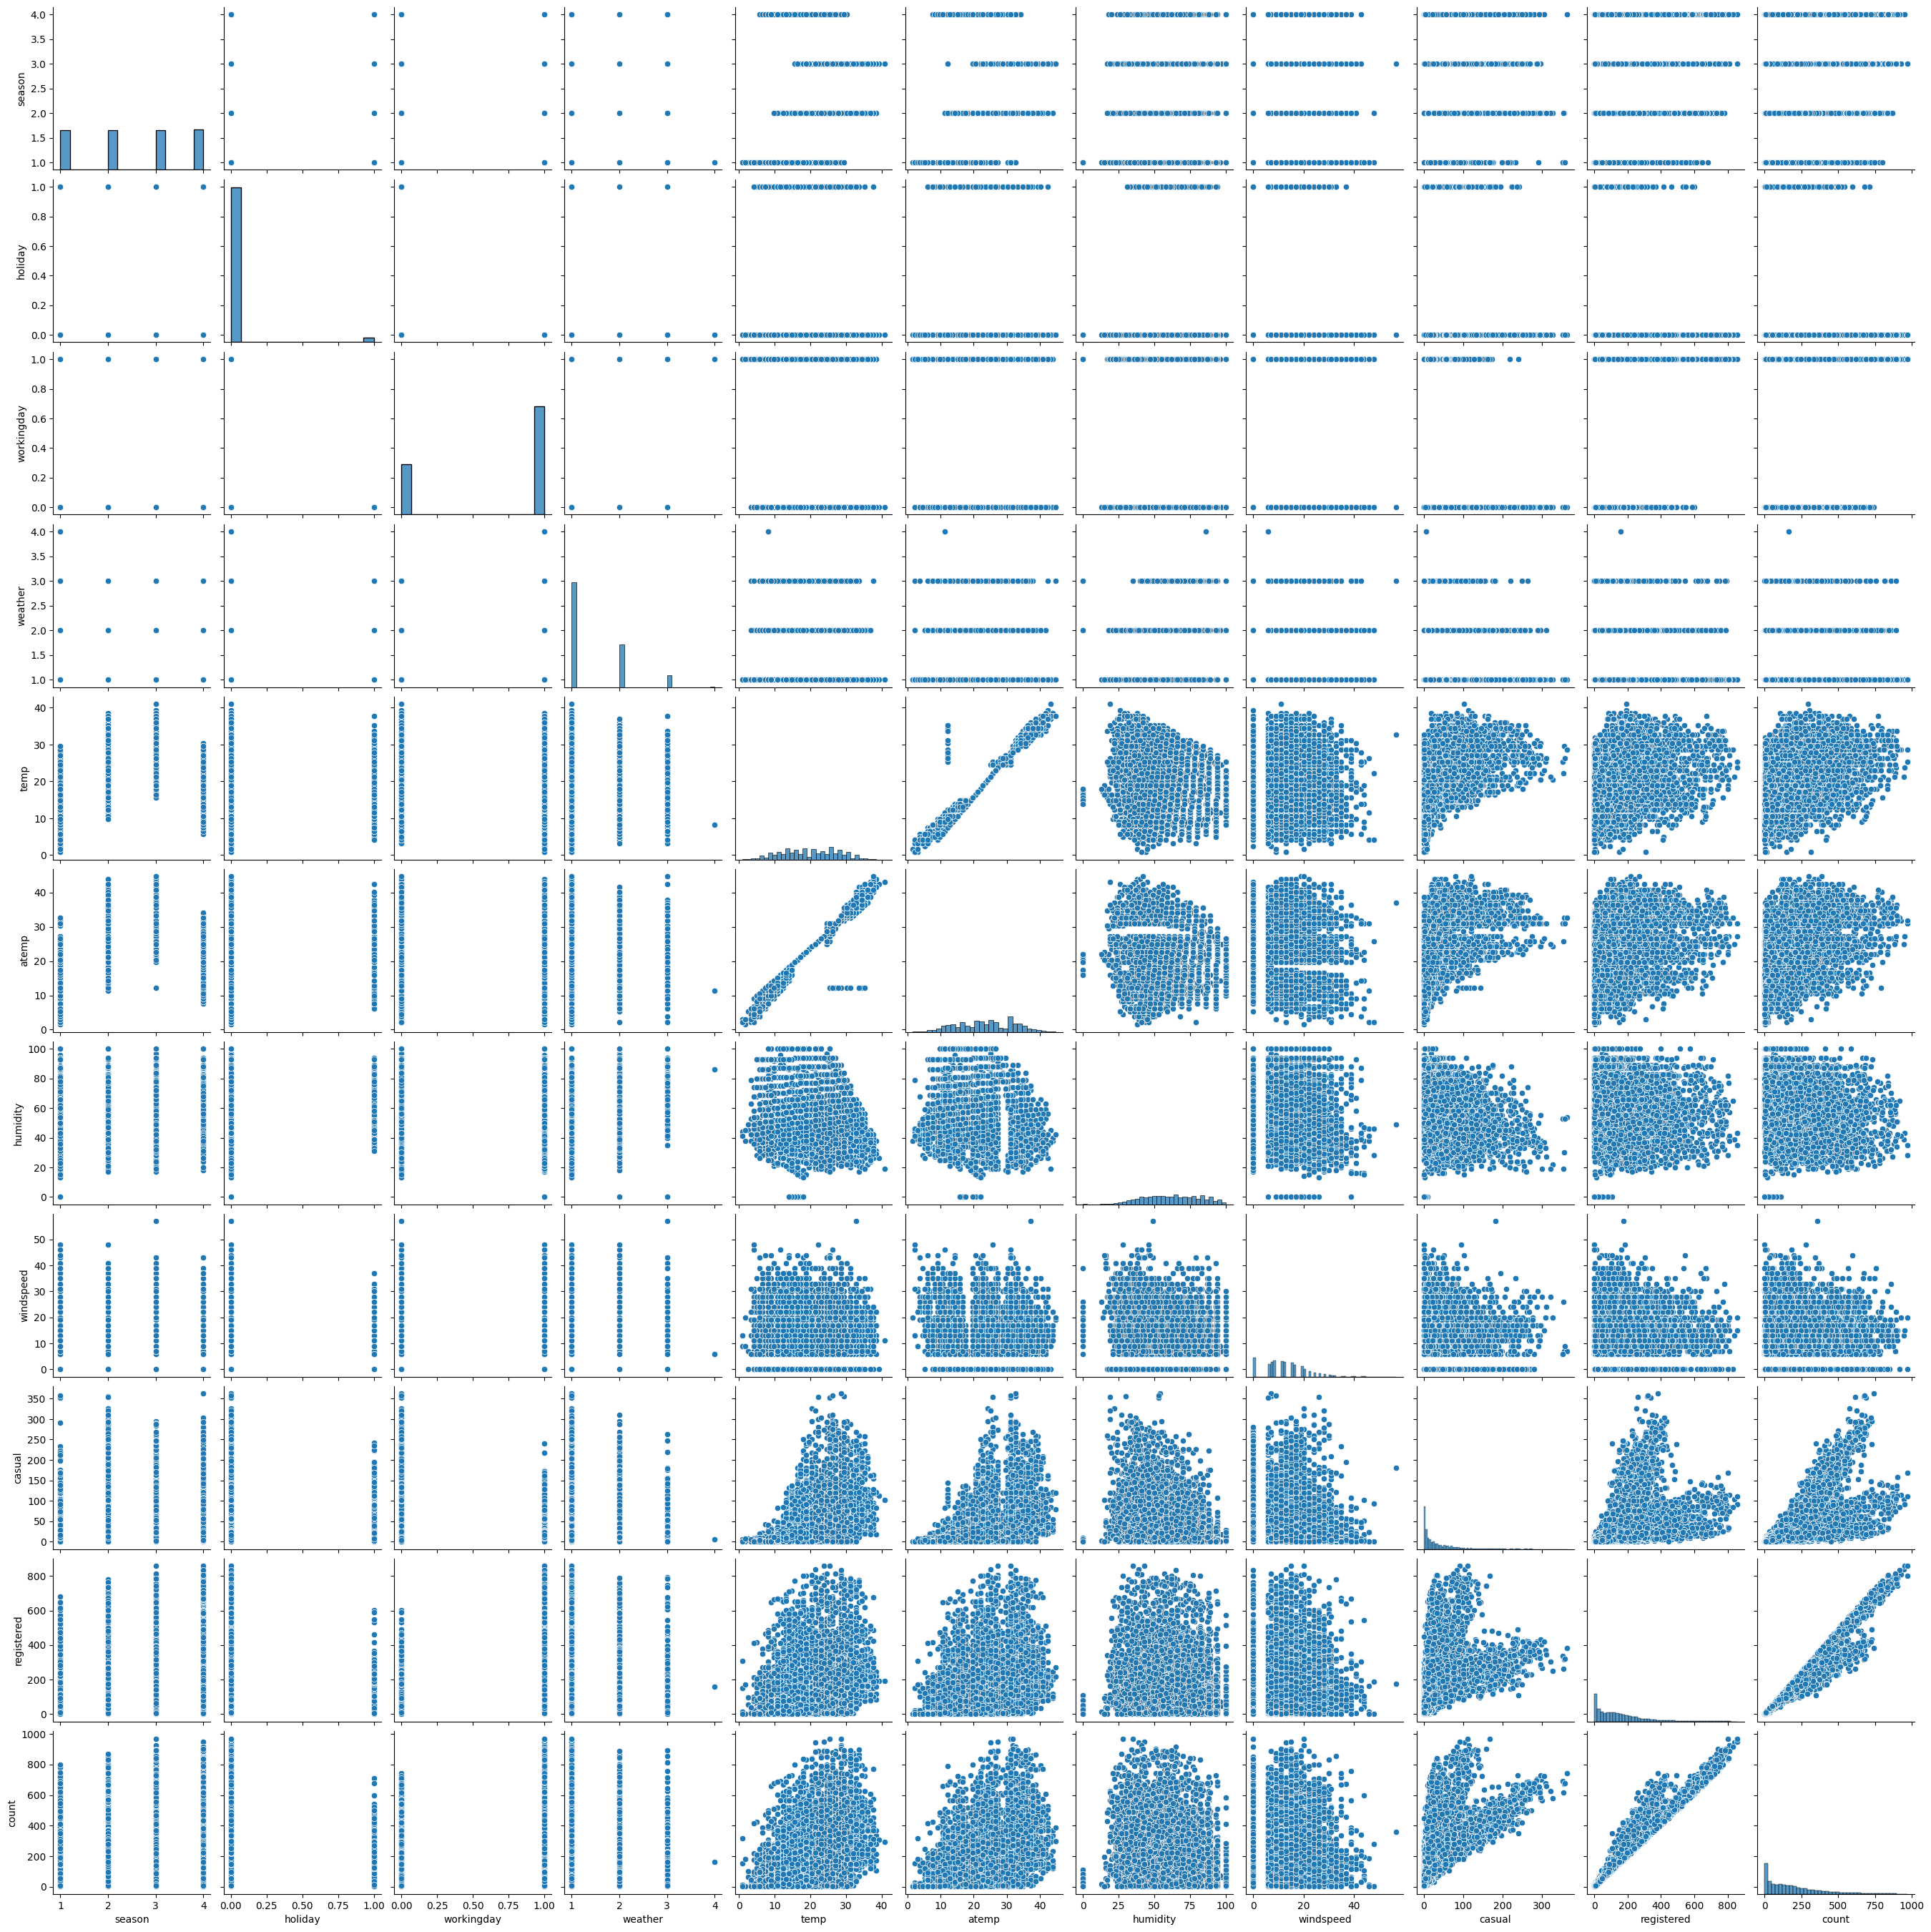

In [39]:
sns.pairplot(data=train_df)

In [40]:
train_df["year"] = train_df.index.year
train_df["month"] = train_df.index.month
train_df["day"] = train_df.index.day
train_df["hour"] = train_df.index.hour

<Axes: xlabel='year', ylabel='count'>

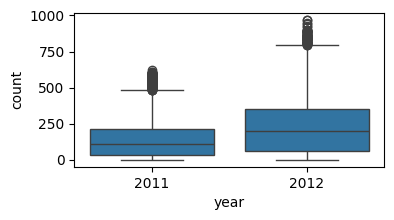

In [41]:
plt.figure(figsize=(4,2))
sns.boxplot(data=train_df, x="year", y="count")

<Axes: xlabel='month', ylabel='count'>

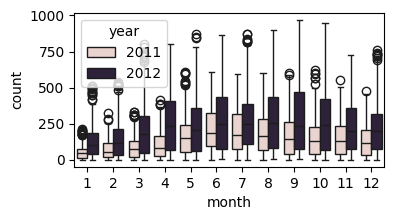

In [42]:
plt.figure(figsize=(4,2))
sns.boxplot(data=train_df, x="month", y="count", hue="year")

<Axes: xlabel='day', ylabel='count'>

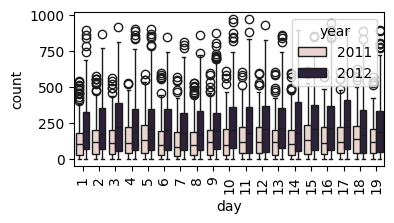

In [43]:
plt.figure(figsize=(4,2))
plt.xticks(rotation=90)
sns.boxplot(data=train_df, x="day", y="count", hue="year")

<Axes: xlabel='hour', ylabel='count'>

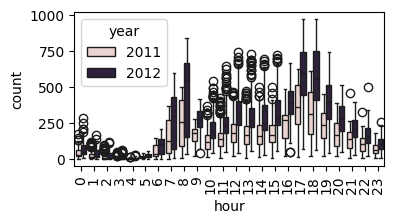

In [44]:
plt.figure(figsize=(4,2))
plt.xticks(rotation=90)
sns.boxplot(data=train_df, x="hour", y="count", hue="year")

<Axes: xlabel='hour', ylabel='count'>

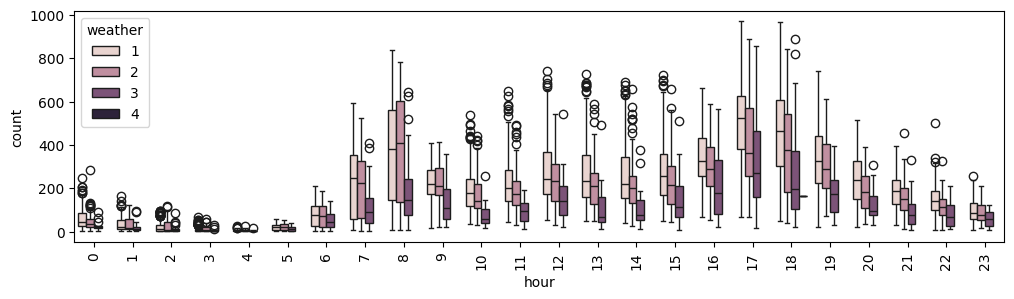

In [45]:
plt.figure(figsize=(12,3))
plt.xticks(rotation=90)
sns.boxplot(data=train_df, x="hour", y="count", hue="weather")

In [46]:
## year : category
## month : number
## 24h 와 1h는 1시간 차이이므로 순환 데이터로 처리 필요

In [47]:
train_df.index.year

Index([2012, 2012, 2012, 2011, 2011, 2012, 2012, 2011, 2011, 2012,
       ...
       2012, 2012, 2012, 2012, 2011, 2012, 2012, 2011, 2011, 2011],
      dtype='int32', name='datetime', length=7620)

In [48]:
type(train_df.index.year)

pandas.core.indexes.base.Index

In [49]:
test_df["year"] = test_df.index.year
test_df["month"] = test_df.index.month
test_df["day"] = test_df.index.day
test_df["hour"] = test_df.index.hour

In [56]:
# 연속된 숫자 데이터로 사용 => 순환성을 표현하기 위해 삼각함수로 변환
# year : category, month/hour : number (cyclical)
# sine함수만 사용하는 경우는 0, 180, 360도 값이 같아지는 문제 발생 => sin/cos 함수 동시 사용
train_df["sin_hour"] = np.sin(train_df["hour"] / 24 * 2 * np.pi)
train_df["cos_hour"] = np.cos(train_df["hour"] / 24 * 2 * np.pi)

In [57]:
test_df["sin_hour"] = np.sin(test_df["hour"] / 24 * 2 * np.pi)
test_df["cos_hour"] = np.cos(test_df["hour"] / 24 * 2 * np.pi)

In [58]:
train_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'sin_hour', 'cos_hour'],
      dtype='object')

In [59]:
# 숫자 데이터 : temp, humidity, windspeed, sin_hour, cos_hour
# 카테고리 데이터 : season, holiday, workingday, weather, year
num_features = ["temp", "humidity", "windspeed", "sin_hour", "cos_hour"]
cat_features = ["season", "holiday", "workingday", "weather", "year"]

In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [106]:
sc = StandardScaler()
sc.fit(train_df[num_features])
X = pd.DataFrame(sc.transform(train_df[num_features]), columns=num_features)
y = train_df["count"]
test_x = pd.DataFrame(sc.transform(test_df[num_features]), columns=num_features)

In [107]:
onehot = OneHotEncoder(drop="first", sparse_output=False)
onehot.fit(train_df[cat_features])
onehot.get_feature_names_out()

array(['season_2', 'season_3', 'season_4', 'holiday_1', 'workingday_1',
       'weather_2', 'weather_3', 'weather_4', 'year_2012'], dtype=object)

In [108]:
X[onehot.get_feature_names_out()] = onehot.transform(train_df[cat_features])
test_x[onehot.get_feature_names_out()] = onehot.transform(test_df[cat_features])

In [109]:
X.columns, test_x.columns

(Index(['temp', 'humidity', 'windspeed', 'sin_hour', 'cos_hour', 'season_2',
        'season_3', 'season_4', 'holiday_1', 'workingday_1', 'weather_2',
        'weather_3', 'weather_4', 'year_2012'],
       dtype='object'),
 Index(['temp', 'humidity', 'windspeed', 'sin_hour', 'cos_hour', 'season_2',
        'season_3', 'season_4', 'holiday_1', 'workingday_1', 'weather_2',
        'weather_3', 'weather_4', 'year_2012'],
       dtype='object'))

In [110]:
X.describe()

,temp,humidity,windspeed,sin_hour,cos_hour,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4,year_2012
count,7.620000e+03,7.620000e+03,7.620000e+03,7.620000e+03,7.620000e+03,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000
mean,1.039705e-16,-1.081666e-16,-3.170401e-17,1.491953e-17,-1.491953e-17,0.251050,0.251050,0.251181,0.026903,0.681496,0.265617,0.076115,0.000131,0.497507
std,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,0.433646,0.433646,0.433721,0.161810,0.465927,0.441690,0.265200,0.011456,0.500027
min,-2.496064e+00,-3.214714e+00,-1.579842e+00,-1.403861e+00,-1.410666e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.082752e-01,-7.722164e-01,-7.213078e-01,-9.897947e-01,-9.962817e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.561910e-02,7.304170e-03,1.399181e-02,9.850503e-03,4.130672e-03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.740266e-01,7.868248e-01,5.044654e-01,1.009496e+00,1.004543e+00,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2.672789e+00,1.982090e+00,5.409201e+00,1.423562e+00,1.418927e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [121]:
X1 = X.reset_index(drop=True)
X1.head()

,temp,humidity,windspeed,sin_hour,cos_hour,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4,year_2012
0,-0.702788,0.475017,-0.230834,-0.697005,-1.221119,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.352079,-0.096632,-0.230834,0.375746,1.370719,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.723408,-0.148600,-0.476482,-0.697005,1.229381,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.406947,-0.356472,0.750113,0.009851,-1.410666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.141106,-0.876153,0.259639,-0.989795,-0.996282,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [126]:
y1 = y.reset_index(drop=True)

In [129]:
X1.shape, y1.shape

((7620, 14), (7620,))

In [134]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [135]:
train_x.shape

(5334, 14)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [137]:
lr = LinearRegression()
lr.fit(train_x, train_y)
lr.score(valid_x, valid_y)

0.5155009098151936

In [138]:
root_mean_squared_error(valid_y, lr.predict(valid_x))

126.76991224256564

In [139]:
test_df["count"] = lr.predict(test_x)

In [140]:
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,sin_hour,cos_hour,count
datetime,,,,,,,,,,,,,,,
2012-06-14 13:00:00,2,0,1,1,27.88,31.820,57,11.0014,2012,6,14,13,-0.258819,-9.659258e-01,413.520317
2011-11-13 00:00:00,4,0,0,2,16.40,20.455,58,12.9980,2011,11,13,0,0.000000,1.000000e+00,46.451492
2012-08-16 01:00:00,3,0,1,1,26.24,30.305,73,0.0000,2012,8,16,1,0.258819,9.659258e-01,166.893142
2011-12-14 19:00:00,4,0,1,2,14.76,18.180,62,7.0015,2011,12,14,19,-0.965926,2.588190e-01,209.475512
2011-10-12 06:00:00,4,0,1,2,22.14,25.760,88,16.9979,2011,10,12,6,1.000000,6.123234e-17,64.509791


In [141]:
test_df[["count"]].to_csv(datapath / "lr_submission.csv")

In [174]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_log_error, get_scorer_names

In [175]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [179]:
# grid search => 무조건 평가값이 큰 것을 찾음
# 오차를 평가값으로 쓸 땐 작은 것을 찾아야 하므로
# 오차에 마이너스를 붙여서 방향을 바꿈

param_grid = {"n_neighbors": [3,5,7,10]}
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_log_error")
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 10]},
             scoring='neg_root_mean_squared_log_error')

In [180]:
grid.best_params_

{'n_neighbors': 3}

In [181]:
grid.cv_results_["mean_test_score"]

array([-0.57244336, -0.59070829, -0.61246434, -0.64079045])

In [182]:
grid.score(train_x, train_y), grid.score(valid_x, valid_y)

(-0.39774775413243624, -0.5582680033865908)

In [183]:
root_mean_squared_log_error(valid_y, grid.predict(valid_x))

0.5582680033865908

In [210]:
submit = pd.read_csv(datapath / "sample-submission.csv")
submit["count"] = grid.predict(test_x)
submit.to_csv(datapath / "knn_submission.csv", index=False)

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
param_grid = {"max_depth": [3,10,15,20,25,30], "min_samples_leaf": [1,5,10,20,30]}
grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid=param_grid, 
                    cv=5, scoring="neg_root_mean_squared_log_error", n_jobs=-1)
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 5, 10, 20, 30]},
             scoring='neg_root_mean_squared_log_error')

In [218]:
grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 1}

In [219]:
root_mean_squared_log_error(valid_y, grid.predict(valid_x))

0.3861115987925676

In [237]:
from sklearn.metrics import r2_score

In [238]:
r2_score(valid_y, grid.predict(valid_x))

0.9262766085374453

In [220]:
test_df["count"] = grid.predict(test_x)

In [221]:
test_df["count"].to_csv(datapath / "rf_submission.csv")

In [222]:
test_df["count"].describe()

count    3266.000000
mean      191.462403
std       172.763973
min         1.258597
25%        50.532571
50%       151.350708
75%       286.436477
max       851.045455
Name: count, dtype: float64

In [227]:
for param, score in zip(grid.cv_results_["params"], grid.cv_results_["mean_test_score"]):
    print(param, round(score, 2))

{'max_depth': 3, 'min_samples_leaf': 1} -0.87
{'max_depth': 3, 'min_samples_leaf': 5} -0.87
{'max_depth': 3, 'min_samples_leaf': 10} -0.87
{'max_depth': 3, 'min_samples_leaf': 20} -0.87
{'max_depth': 3, 'min_samples_leaf': 30} -0.87
{'max_depth': 10, 'min_samples_leaf': 1} -0.39
{'max_depth': 10, 'min_samples_leaf': 5} -0.41
{'max_depth': 10, 'min_samples_leaf': 10} -0.44
{'max_depth': 10, 'min_samples_leaf': 20} -0.51
{'max_depth': 10, 'min_samples_leaf': 30} -0.55
{'max_depth': 15, 'min_samples_leaf': 1} -0.38
{'max_depth': 15, 'min_samples_leaf': 5} -0.4
{'max_depth': 15, 'min_samples_leaf': 10} -0.44
{'max_depth': 15, 'min_samples_leaf': 20} -0.51
{'max_depth': 15, 'min_samples_leaf': 30} -0.55
{'max_depth': 20, 'min_samples_leaf': 1} -0.38
{'max_depth': 20, 'min_samples_leaf': 5} -0.4
{'max_depth': 20, 'min_samples_leaf': 10} -0.44
{'max_depth': 20, 'min_samples_leaf': 20} -0.51
{'max_depth': 20, 'min_samples_leaf': 30} -0.55
{'max_depth': 25, 'min_samples_leaf': 1} -0.38
{'max_de

<Axes: xlabel='count', ylabel='Count'>

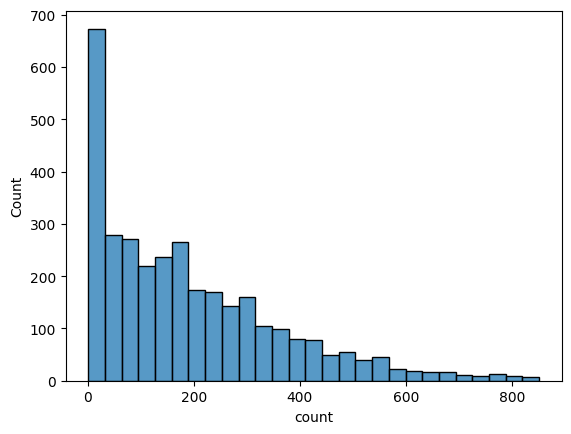

In [236]:
sns.histplot(data=test_df, x="count")

# Multi output 모델

In [239]:
from sklearn.multioutput import MultiOutputRegressor

In [242]:
multi = MultiOutputRegressor(
    RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, n_jobs=-1), n_jobs=-1)

In [244]:
y2 = train_df[["casual", "registered", "count"]]

In [245]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y2, test_size=0.3, random_state=42, shuffle=True)

In [246]:
multi.fit(train_x, train_y[["casual", "registered"]])

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=20, n_jobs=-1,
                                                     random_state=42),
                     n_jobs=-1)

In [247]:
multi.predict(valid_x)

array([[ 67.68      , 309.4       ],
       [ 13.63      , 559.06      ],
       [ 45.80132143, 101.62      ],
       ...,
       [ 76.855     , 323.8       ],
       [ 75.56      , 218.25      ],
       [ 83.0075    , 138.68      ]])

In [253]:
predict = multi.predict(valid_x)

In [254]:
root_mean_squared_log_error(valid_y["casual"], predict[:, 0])

0.588918365602034

In [256]:
root_mean_squared_log_error(valid_y["registered"], predict[:, 1])

0.37400408247663236

In [258]:
root_mean_squared_log_error(valid_y["count"], predict.sum(axis=1))

0.3839410663147677

In [262]:
predict.sum(axis=1).shape

(2286,)

In [264]:
test_df["count"] = multi.predict(test_x).sum(axis=1)

In [265]:
test_df["count"].to_csv(datapath / "multi_submission.csv")